In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, normalize
from csbdeep.utils import axes_dict, plot_some, plot_history
from stardist import fill_label_holes, random_label_cmap
from stardist import Config, StarDist, StarDistData

np.random.seed(42)
lbl_cmap = random_label_cmap()

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data/u934/service_imageri

In [2]:
X = sorted(glob('/data/u934/service_imagerie/v_kapoor/HEARD/UNet-training/images/*.tif'))
Y = sorted(glob('/data/u934/service_imagerie/v_kapoor/HEARD/UNet-training/masks/*.tif'))
assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))


In [5]:
X = list(map(imread,X))
Y = list(map(imread,Y))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
X = [normalize(x,1,99.8) for x in tqdm(X)]
Y = [fill_label_holes(y.astype(int)) for y in tqdm(Y)]






  0%|          | 0/84 [00:00<?, ?it/s]

 24%|██▍       | 20/84 [00:00<00:00, 191.24it/s]

 55%|█████▍    | 46/84 [00:00<00:00, 223.79it/s]

 93%|█████████▎| 78/84 [00:00<00:00, 254.46it/s]

100%|██████████| 84/84 [00:00<00:00, 255.70it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

 18%|█▊        | 15/84 [00:00<00:00, 147.45it/s]

 36%|███▌      | 30/84 [00:00<00:00, 142.80it/s]

 51%|█████     | 43/84 [00:00<00:00, 130.88it/s]

 62%|██████▏   | 52/84 [00:01<00:00, 41.17it/s] 

 70%|███████   | 59/84 [00:02<00:00, 28.02it/s]

 76%|███████▌  | 64/84 [00:03<00:00, 20.21it/s]

 81%|████████  | 68/84 [00:03<00:00, 18.75it/s]

 85%|████████▍ | 71/84 [00:04<00:00, 17.60it/s]

 88%|████████▊ | 74/84 [00:04<00:00, 17.04it/s]

 90%|█████████ | 76/84 [00:04<00:00, 16.65it/s]

 93%|█████████▎| 78/84 [00:04<00:00, 16.64it/s]

 95%|█████████▌| 80/84 [00:04<00:00, 16.12it/s]

 98%|█████████▊| 82/84 [00:05<00:00, 15.34it/s]

100%|██████████| 84/84 [00:05<00:00, 14.20it/s]



In [8]:
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
n_val = int(round(0.15 * len(X)))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]
X_val, Y_val = [X[i] for i in ind_val]  , [Y[i] for i in ind_val]
X_trn, Y_trn = [X[i] for i in ind_train], [Y[i] for i in ind_train] 



print('number of images: %3d' % len(X))
print('- training:       %3d' % len(X_trn))
print('- validation:     %3d' % len(X_val))
print(X[0].shape[0])

number of images:  84
- training:        71
- validation:      13
512


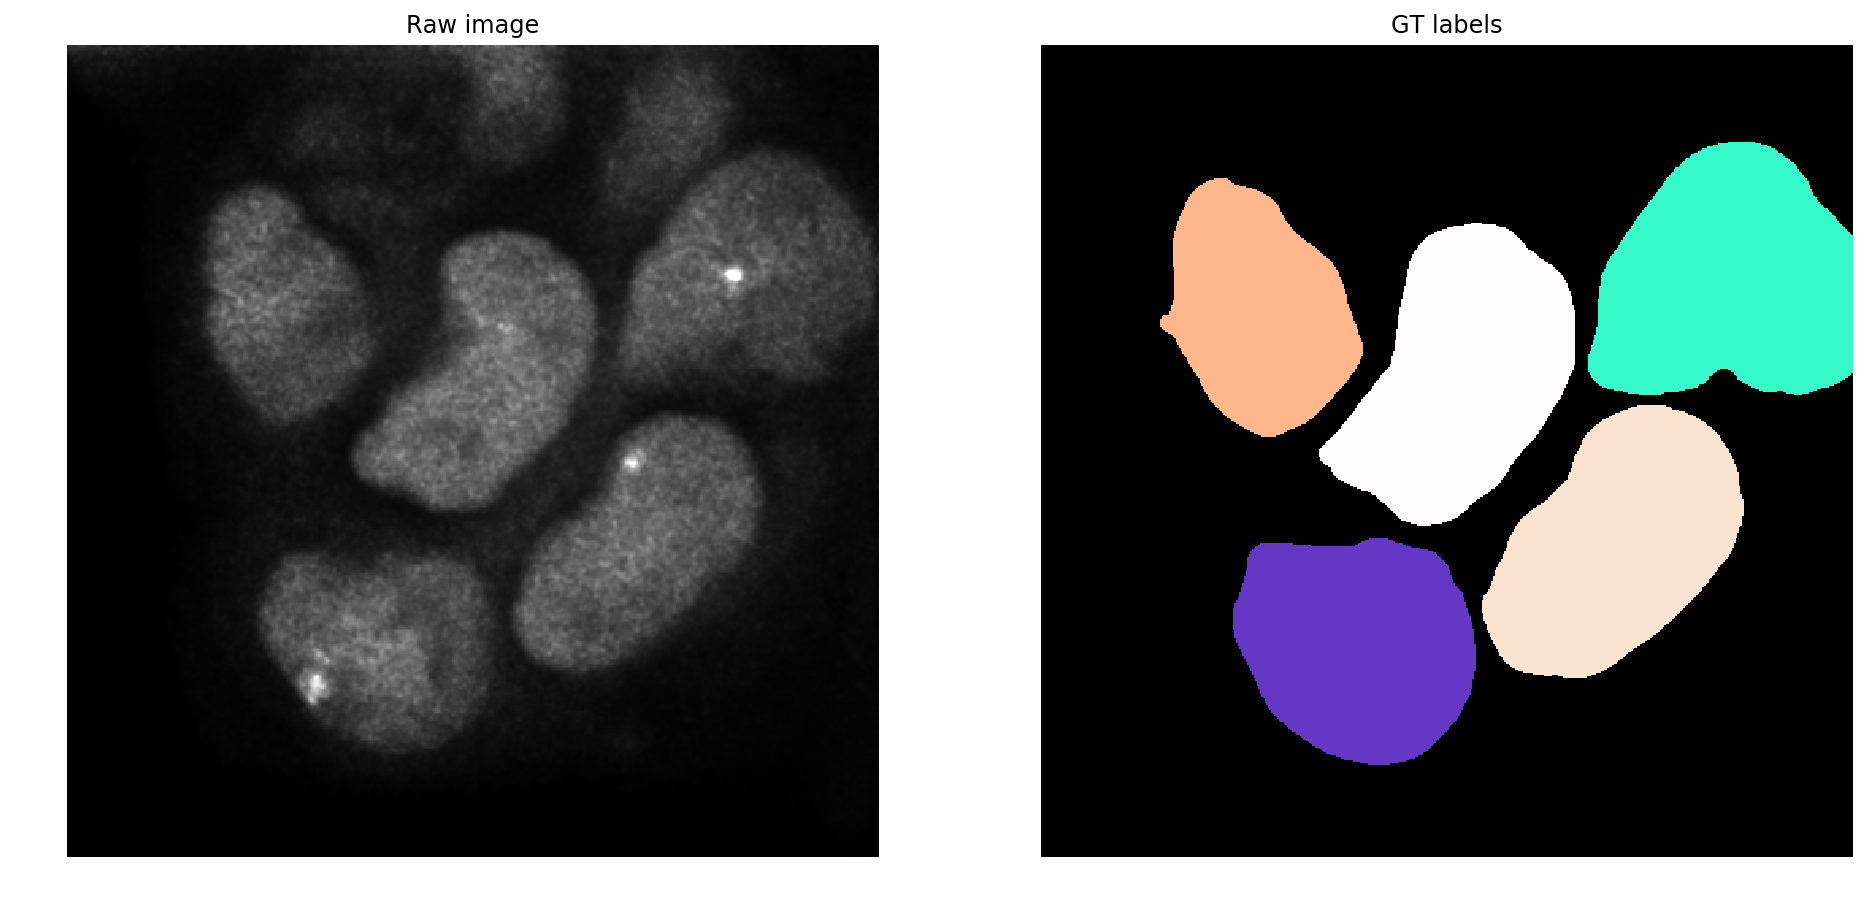

In [9]:
i = 9
img, lbl = X[i], Y[i]
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image')
plt.subplot(122); plt.imshow(lbl,cmap=lbl_cmap); plt.axis('off'); plt.title('GT labels')
None;

In [ ]:
np.random.seed(42)
data = StarDistData(X,Y,batch_size=1,n_rays=32,patch_size=(512,512),shape_completion=False)

In [ ]:
(img,dist_mask), (prob,dist) = data[0]

fig, ax = plt.subplots(2,2, figsize=(12,12))
for a,d,cm,s in zip(ax.flat, [img,prob,dist_mask,dist], ['gray','magma','bone','viridis'],
                    ['Input image','Object probability','Distance mask','Distance (0°)']):
    a.imshow(d[0,...,0],cmap=cm)
    a.set_title(s)
plt.tight_layout()
None;

In [ ]:
print(Config.__doc__)

In [ ]:
conf = Config(train_batch_size=10, train_shape_completion=False, train_patch_size = (512,512), train_epochs = 50, train_steps_per_epoch = 100)
print(conf)
vars(conf)

In [ ]:
model = StarDist(conf, name='StemCellWithoutShapeCompletion', basedir='models')

In [ ]:
history = model.train(X_trn,Y_trn,validation_data=(X_val,Y_val))

In [ ]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['prob_loss','val_prob_loss','dist_loss','val_dist_loss']);